In [1]:
import pandas as pd
import os
import seaborn as sns
from datetime import * 
from functools import reduce
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import streamlit as st

In [ ]:
#Path불러오기 
folder_path = os.path.join("./output_data/")
daily_sema = pd.read_csv(f'{folder_path}'+'daily_fitbit_sema_df_unprocessed.csv')
hourly_sema = pd.read_csv(f'{folder_path}'+'hourly_fitbit_sema_df_unprocessed.csv')
breq = pd.read_csv(f'{folder_path}'+'breq.csv')
panas = pd.read_csv(f'{folder_path}'+'panas.csv')
personality = pd.read_csv(f'{folder_path}'+'personality.csv')
stai = pd.read_csv(f'{folder_path}'+'stai.csv')
ttm = pd.read_csv(f'{folder_path}'+'ttm.csv')

In [3]:
# ###모든 글자는 st.markdown(
#     "<h2 style='text-align: center;'>스트레스 관리와 수면의 질, 활동과의 상관관계</h2>"
#     "<h3 style='text-align: center;'>Top10 heatmap</h3>", 
#     unsafe_allow_html=True
# )###로 표현했음 
st.markdown(
    "<h1 style='text-align: center;'>Kaggle Fitbit Sleep EDA Project</h1>", 
    unsafe_allow_html=True
)

2024-05-13 10:52:04.934 
  command:

    streamlit run C:\Users\user\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

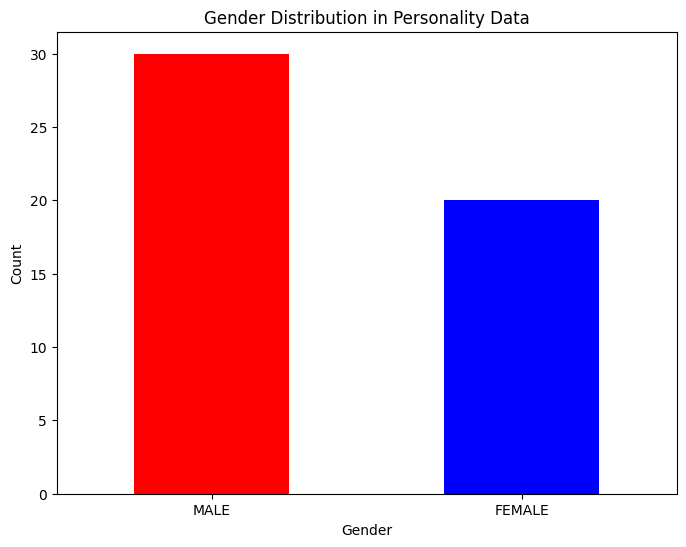

DeltaGenerator()

<Figure size 640x480 with 0 Axes>

In [4]:
gender_counts = personality['gender'].value_counts()
st.markdown(
    "<h3 style='text-align: center;'>Sex Difference</h3>", 
    unsafe_allow_html=True
)
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Personality Data')
plt.xticks(rotation=0)
plt.show()
st.pyplot(plt)

In [ ]:
numeric_columns = daily_sema.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
st.markdown(
    "<h2 style='text-align: center;'>스트레스 관리와 수면의 질, 활동과의 상관관계</h2>"
    "<h3 style='text-align: center;'>Top10 heatmap</h3>", 
    unsafe_allow_html=True
)
st.markdown("""
이 그래프는 가장 상관관계가 높은 상위 10개의 열을 선택하여 히트맵을 그렸습니다. 
            이를 통해 스트레스 관리 능력과 활동, 수면 간의 연결성을 짐작해볼 수 있습니다.
""")
# 가장 상관관계가 높은 상위 10개의 열 찾기
top_correlation_columns = correlation_matrix.abs().stack().nlargest(10).index
top_correlation_matrix = correlation_matrix.loc[top_correlation_columns.get_level_values(0), top_correlation_columns.get_level_values(1)]

# 히트맵 그리기
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(top_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.title('Top 10 Correlation Heatmap (for numeric columns)')
st.pyplot(fig)

In [ ]:
st.markdown(
    "<h2 style='text-align: center;'>스트레스 관리능력과 수면의 관계</h2>"
    "<h3 style='text-align: center;'>stress_score와 sleep_points_percentage의 관계</h3>", 
    unsafe_allow_html=True
)
# 그래프 크기 지정
fig, ax = plt.subplots(figsize=(10, 6))

# stress_score가 60보다 큰 subset 데이터 생성
subset_data = daily_sema[daily_sema['stress_score'] > 60]
subset_data['sleep_points_scaled'] = subset_data['sleep_points_percentage'] * 100

# 회귀선 그리기
sns.regplot(x='stress_score', y='sleep_points_scaled', data=subset_data, line_kws={"color": "red"})

# 선형 회귀 모델 학습
X = subset_data[['stress_score']]
y = subset_data['sleep_points_scaled']
model = LinearRegression()
model.fit(X, y)

# 회귀선 그리기
ax.plot(X, model.predict(X), color='red', label=f'Regression Line (Coefficient: {model.coef_[0]:.2f})')
ax.legend(loc='lower left')
ax.set_xlabel('Stress Score')
ax.set_ylabel('sleep_points_percentage')
ax.set_title('Stress Score vs. sleep_points_percentage (Stress Score > 60)')

# 스트림릿에 그래프 출력
st.pyplot(fig)